In [2]:
#1)

import numpy as np
np.random.seed(23456)

#For the lighthouse problem a cauchy distribution works particularly well as it is a type of probability distribution, based on the parameters x0 and y0 and a dataset x.
#We will be using the log-likelihood (max of a function is the same of the log of the max) as we have products of logs which could result in a very small number which is hard for a pc to process.
#The log-likelihood is essentially the logarithm of the product of the probabilities for each data point in x given x0 and y0

def loglh(x0,y0,x):
  log = 0
  for i in x: log += np.log(y0/(y0**2+(i-x0)**2)/np.pi)
  return log

In [3]:
#We want to now generate this array of 100 variables following an Chauchy distribution around x0=15 and y0=20

from scipy.stats import cauchy

N=100;
x0_true=15;
y0_true=20;

x = cauchy.rvs(loc=x0_true, scale=y0_true, size=N)

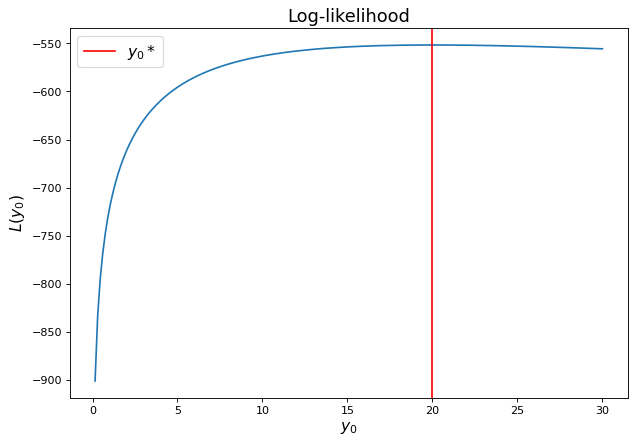

In [4]:
#We calculate the log-likelihood of a range of values of y0 around the true value y0_star

import matplotlib.pyplot as plt

tab_y0 = np.linspace(0,30,200)[1:]   #We start from the second value excluding 0 as y0=0 does not make sense in a Cauchy distribution
logl_y0 = np.array([loglh(x0_true,y0,x) for y0 in tab_y0]) # we compute the loglh for each value in the table

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$L(y_0)$', fontsize=14)
plt.plot(tab_y0,logl_y0)
plt.axvline(y0_true,color="r",label='$y_0*$')
plt.legend(fontsize=14);

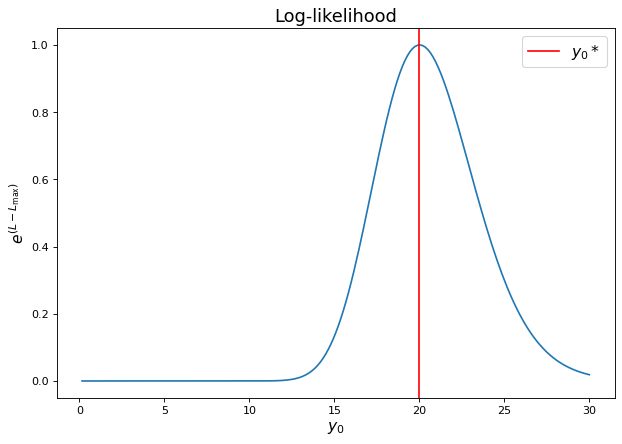

In [5]:
#We can calculate the exponential so it is easier to see

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
plt.plot(tab_y0,np.exp(logl_y0-max(logl_y0)))  #This converts the relative log-likelihoods into values between 0 and 1, with the maximum likelihood being 1 and other values approaching 0 as they get farther from the maximum.
plt.axvline(y0_true,color="r",label='$y_0*$')
plt.legend(fontsize=14);

CPU times: user 5.57 s, sys: 28.4 ms, total: 5.6 s
Wall time: 7.52 s


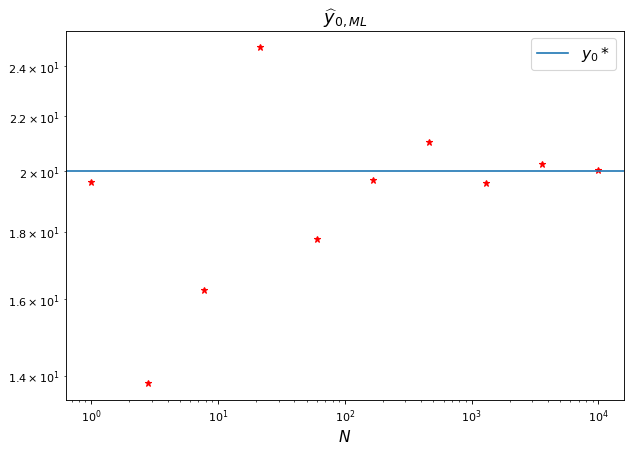

In [6]:
#in this last part we want to compute the maximum likelihood estimator for y0 (y0hat,ML) and see how this varies as N changes

%%time
from scipy.optimize import minimize

tab_N = np.logspace(0, 4, num=10, base=10)   #The function generates 10 numbers logarithmically spaced between 10^0 and 10^4
y0_ML=[]    #empty list that will store the estimated maximum likelihood values of y0 for each value of N
for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  y0_guess = np.random.uniform(0,30) # we have to give a guess for the minimizer algorithm to start
  optimum = minimize(lambda y0:-loglh(x0_true,y0,x),y0_guess, method='Nelder-Mead')   #we minimize the negative as we want the max
  y0_ML.append(optimum.x) #for storing

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('$\widehat{y}_{0,ML}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N,y0_ML,"*",color='r')
plt.axhline(y0_true, label="$y_0*$")
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=14);

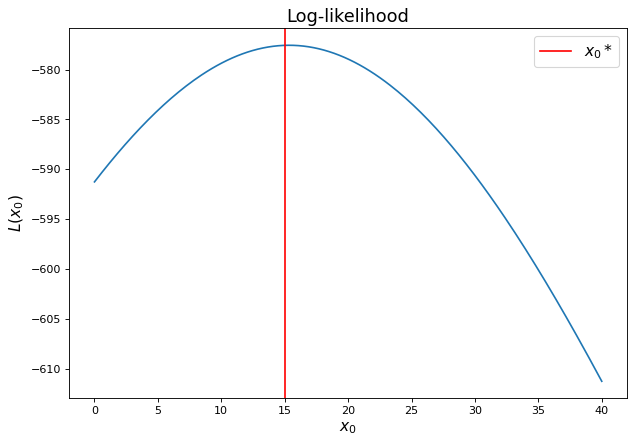

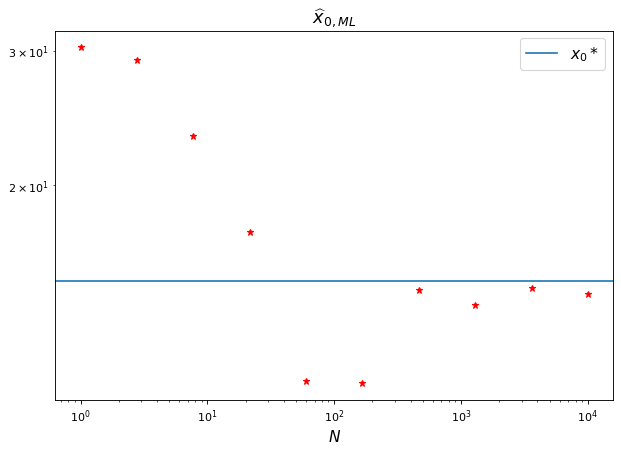

In [7]:
#2) Now we do the same but knowing y0=15

N_2=100;
x0_true_2=15;
y0_true_2=20;

x = cauchy.rvs(loc=x0_true_2, scale=y0_true_2, size=N_2)

tab_x0 = np.linspace(0,40,200)
logl_x0 = np.array([loglh(x0,y0_true_2,x) for x0 in tab_x0]) # we compute the loglh for each value in the table

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$L(x_0)$', fontsize=14)
plt.plot(tab_x0,logl_x0)
plt.axvline(x0_true,color="r",label='$x_0*$')
plt.legend(fontsize=14);

#I skipped the exp step cause its just for visualization

tab_N_2 = np.logspace(0, 4, num=10, base=10)   #The function generates 10 numbers logarithmically spaced between 10^0 and 10^4
x0_ML=[]    #empty list that will store the estimated maximum likelihood values of y0 for each value of N
for N_2 in tab_N_2:
  x=cauchy.rvs(loc=x0_true_2,scale=y0_true_2,size=int(N_2))
  x0_guess = np.random.uniform(0,30) # we have to give a guess for the minimizer algorithm to start
  optimum = minimize(lambda x0:-loglh(x0,y0_true_2,x),x0_guess, method='Nelder-Mead')   #we minimize the negative as we want the max
  x0_ML.append(optimum.x) #for storing

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('$\widehat{x}_{0,ML}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N_2,x0_ML,"*",color='r')
plt.axhline(x0_true_2, label="$x_0*$")
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=14);


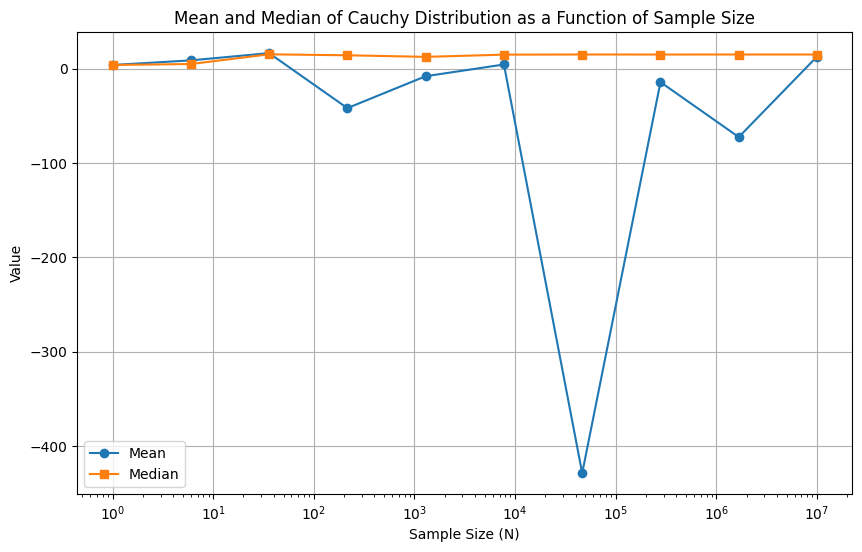

In [8]:
#3) Compute the mean and median od the datasets with N ranging up to 10^7 and make observations

x0_true_3 = 15;
y0_true_3 = 20;

tab_N_3 = np.logspace(0, 7, num=10, base=10)
mean=[]
median=[]
for N_3 in tab_N_3:
  x=cauchy.rvs(loc=x0_true_3,scale=y0_true_3,size=int(N_3))
  mean.append(np.mean(x))
  median.append(np.median(x))

plt.figure(figsize=(10, 6))
plt.plot(tab_N_3, mean, label='Mean', marker='o')
plt.plot(tab_N_3, median, label='Median', marker='s')
plt.xscale('log')
plt.xlabel('Sample Size (N)')
plt.ylabel('Value')
plt.title('Mean and Median of Cauchy Distribution as a Function of Sample Size')
plt.legend()
plt.grid(True)
plt.show()

#What I observe is a robust median and a highly unstable mean.

<ipython-input-2-d14097841559>:12: RuntimeWarning: invalid value encountered in log
  for i in x: log += np.log(y0/(y0**2+(i-x0)**2)/np.pi)
<ipython-input-10-362002f38eb3>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x      #finds the optimal value and the stores it in the array, repeating this for all the x arrays of simulated data
<ipython-input-2-d14097841559>:12: RuntimeWarning: divide by zero encountered in log
  for i in x: log += np.log(y0/(y0**2+(i-x0)**2)/np.pi)
<ipython-input-10-362002f38eb3>:7: RuntimeWarning: invalid value encountered in log
  jp= - np.log(y0)                                #This line calculates the log of the Jeffreys prior for the parameter y0
<ipython-input-10-362002f38eb3>:8: Run

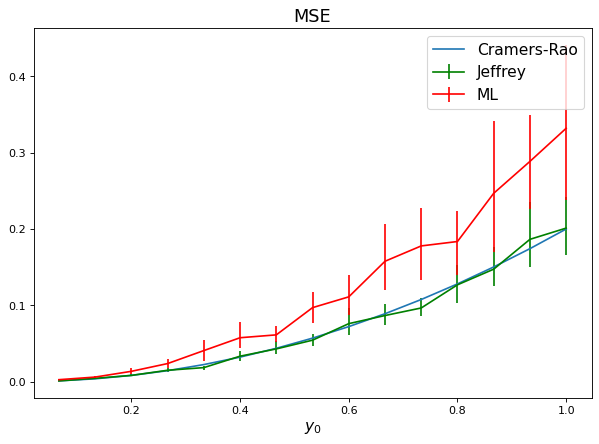

In [10]:
# MSE for gauging ESTIMATOR performance

#In this section we will use the MSE to gauge the performance of the likelihood estimator and the Jeffreys prior (the first does not use any prior information the second does albeit non informative).
#We will then compare the two with the Cramer-Rao bound.

def jeffpost(x0,y0,x):
  jp= - np.log(y0)                                #This line calculates the log of the Jeffreys prior for the parameter y0
  for i in x: jp+=np.log(y0/((y0**2+(i-x0)**2)*np.pi))   #adds the log-likelihood for each data point to jp
  return jp

#lets define a function to compute the estimators given a function to minimize, as we will often re-use it

def minimizer_y0(func,y0):      #the function is generally a log-likelihood or log-posterior
  y0_est=np.zeros(N_rep)         #initializes the array where the y0 values will be stored
  for ir in range(N_rep):
    x=cauchy.rvs(loc=x0_true,scale=y0,size=N)          #generates the random values
    y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x      #finds the optimal value and the stores it in the array, repeating this for all the x arrays of simulated data
  return y0_est;

#-------------------------------

N_est=15                               #number of true values y0
tab_y0=np.linspace(0,1,N_est+1)[1:]   #generates 15 values between 0 and 1 excluding 1.
N = 10                                  #number of values in array x
N_rep = 500                               #number of estimations of y0 in the maximizer function

#Lets compute N_rep estimates for y0 with both methods


y0_ML= np.array([ minimizer_y0(loglh,y0) for y0 in tab_y0])
y0_J= np.array([ minimizer_y0(jeffpost,y0) for y0 in tab_y0])

#Now we are ready to calculate the MSE of the N_rep estimations of y0, plus we would like the CI

from numpy import percentile
from numpy.random import choice

def MSE_est(y0_est,y0):
  N_boot=100
  MSE = (y0_est - np.full(N_rep, y0))**2 #calculates the MSE avoiding for-loops as they are inefficient
  MSE_mean = MSE.mean()
  MSE_boot = choice(MSE,(N_boot,N_rep))  #uses bootstrapping to create new samples of MSE
  MSE_boot_mean = MSE_boot.mean(axis=1)
  CI_min = percentile(MSE_boot_mean, [2.5,97.5])[0]
  CI_max = percentile(MSE_boot_mean, [2.5,97.5])[1]

  return MSE_mean, CI_min, CI_max

#finally we compute the MSE for the y0's

MSE_ML_10 = np.zeros(N_est)
CI_min_ML_10 = np.zeros(N_est)
CI_max_ML_10 = np.zeros(N_est)
MSE_J_10 = np.zeros(N_est)
CI_min_J_10 = np.zeros(N_est)
CI_max_J_10 = np.zeros(N_est)

for j,y0 in enumerate(tab_y0):
  MSE, CI_min, CI_max = MSE_est(y0_ML[j], y0)
  MSE_ML_10[j] = MSE
  CI_min_ML_10[j] = CI_min
  CI_max_ML_10[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(y0_J[j], y0)
  MSE_J_10[j] = MSE
  CI_min_J_10[j] = CI_min
  CI_max_J_10[j] = CI_max

#Now lets compare them to the Cramer-Rao bound

fig = plt.figure(figsize=(9, 6), dpi=80)

plt.title('MSE', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.errorbar(tab_y0,MSE_J_10,yerr=[MSE_J_10-CI_min_J_10, CI_max_J_10-MSE_J_10],marker="",color='g', label='Jeffrey')
plt.errorbar(tab_y0,MSE_ML_10,yerr=[MSE_ML_10-CI_min_ML_10, CI_max_ML_10-MSE_ML_10],marker="",color='r', label='ML')
plt.plot(tab_y0, 2*tab_y0*tab_y0/N, label='Cramers-Rao')
plt.legend(fontsize=14)

<ipython-input-15-a03cbc1abd12>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x0_est[ir] = res.x


KeyboardInterrupt: 

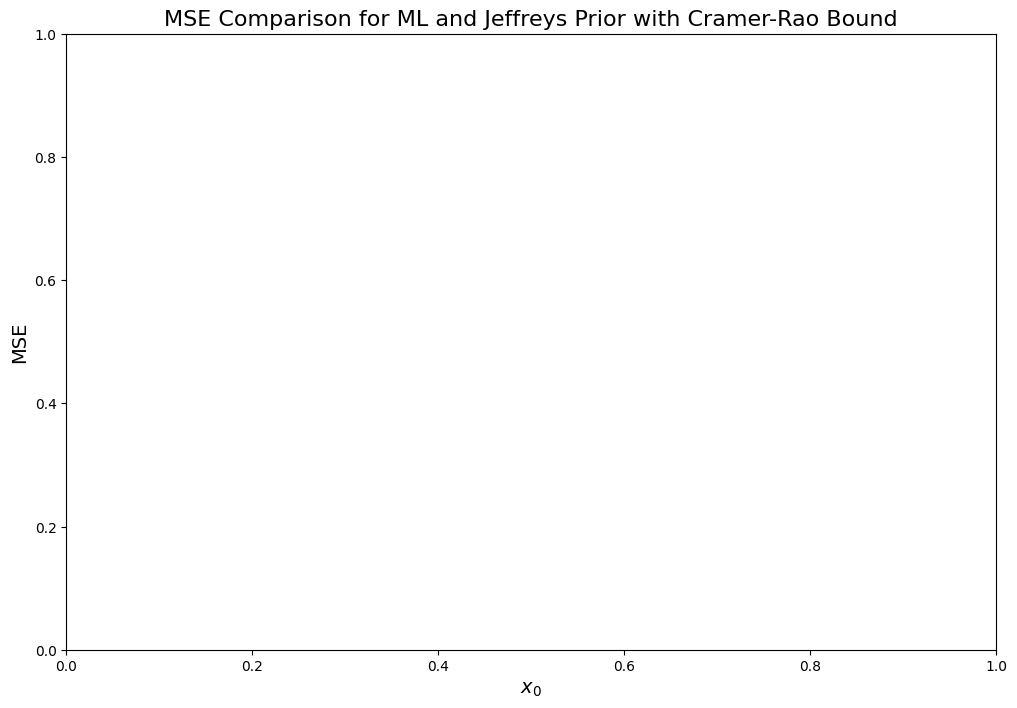

In [15]:
#4) Comparison, logically N=3 is worse performing and N=50 takes alot to compute.

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import cauchy
from numpy.random import choice
from numpy import percentile

# Define the jeffpost function
def jeffpost(x0, y0, x):
    jp = - np.log(y0)  # Jeffreys prior
    for i in x:
        jp += np.log(y0 / ((y0**2 + (i - x0)**2) * np.pi))  # Log-likelihood for each data point
    return jp

# Define the minimizer function
def minimizer_y0(func, y0, N, N_rep, x0_true):
    y0_est = np.zeros(N_rep)
    for ir in range(N_rep):
        x = cauchy.rvs(loc=x0_true, scale=y0, size=N)  # Generate data
        y0_est[ir] = minimize(lambda y: -func(x0_true, y, x), np.random.uniform(0, 30), method='Nelder-Mead').x
    return y0_est

# Define the MSE function
def MSE_est(y0_est, y0, N_rep, N_boot=100):
    MSE = (y0_est - np.full(N_rep, y0)) ** 2  # Compute MSE
    MSE_mean = MSE.mean()
    MSE_boot = choice(MSE, (N_boot, N_rep))  # Bootstrap resampling
    MSE_boot_mean = MSE_boot.mean(axis=1)
    CI_min = percentile(MSE_boot_mean, 2.5)
    CI_max = percentile(MSE_boot_mean, 97.5)
    return MSE_mean, CI_min, CI_max

# Parameters
x0_true = 20
N_rep = 500
N_est = 15
tab_y0 = np.linspace(0, 1, N_est + 1)[1:]  # Generating values between 0 and 1 (excluding 0)

# Loop over different values of N
N_values = [3, 10, 50]  # The values of N to loop over
colors = ['b', 'r', 'g', 'c', 'm', 'y']  # Define 6 different colors

# Plot initialization
fig = plt.figure(figsize=(12, 8))

plt.title('MSE Comparison for ML and Jeffreys Prior with Cramer-Rao Bound', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('MSE', fontsize=14)

for idx, N in enumerate(N_values):
    # Compute estimates for both methods
    y0_ML = np.array([minimizer_y0(loglh, y0, N, N_rep, x0_true) for y0 in tab_y0])
    y0_J = np.array([minimizer_y0(jeffpost, y0, N, N_rep, x0_true) for y0 in tab_y0])

    # Calculate the MSE and CIs
    MSE_ML = np.zeros(N_est)
    CI_min_ML = np.zeros(N_est)
    CI_max_ML = np.zeros(N_est)
    MSE_J = np.zeros(N_est)
    CI_min_J = np.zeros(N_est)
    CI_max_J = np.zeros(N_est)

    for j, y0 in enumerate(tab_y0):
        MSE, CI_min, CI_max = MSE_est(y0_ML[j], y0, N_rep)
        MSE_ML[j] = MSE
        CI_min_ML[j] = CI_min
        CI_max_ML[j] = CI_max
        MSE, CI_min, CI_max = MSE_est(y0_J[j], y0, N_rep)
        MSE_J[j] = MSE
        CI_min_J[j] = CI_min
        CI_max_J[j] = CI_max

    # Plot the results for both ML and Jeffrey's for the current N value
    plt.errorbar(tab_y0, MSE_J, yerr=[MSE_J - CI_min_J, CI_max_J - MSE_J], fmt=f'{colors[idx]}-', label=f'Jeffrey N={N}')
    plt.errorbar(tab_y0, MSE_ML, yerr=[MSE_ML - CI_min_ML, CI_max_ML - MSE_ML], fmt=f'{colors[idx]}--', label=f'ML N={N}')

    # Cramer-Rao bound
    plt.plot(tab_y0, 2 * tab_y0 ** 2 / N, f'{colors[idx]}-.', label=f'Cramer-Rao N={N}')

plt.legend(fontsize=12)
plt.show()





<ipython-input-17-3c8972fdf19f>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x0_est[ir] = res.x


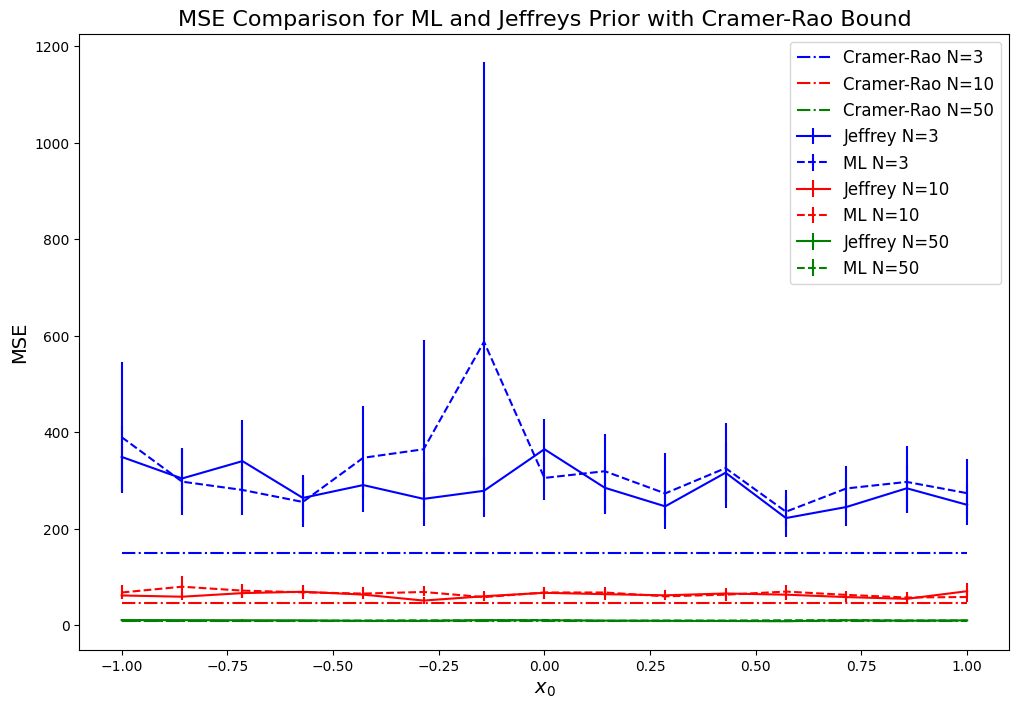

In [17]:
#5) We would like to operate with the known being y0=15

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import cauchy
from numpy.random import choice
from numpy import percentile

# Define the log-likelihood function for x0
def loglh_x0(x0, y0, x):
    logl = 0
    for i in x:
        logl += np.log(y0 / ((y0**2 + (i - x0)**2) * np.pi))  # Cauchy likelihood
    return logl

# Define the Jeffreys prior posterior function for x0
def jeffpost_x0(x0, y0, x):
    # Jeffreys prior for x0 is uniform (log prior = 0)
    jp = 0
    for i in x:
        jp += np.log(y0 / ((y0**2 + (i - x0)**2) * np.pi))  # Cauchy likelihood
    return jp

# Define the minimizer function for x0 (both for ML and Jeffreys)
def minimizer_x0(func, x0_true, y0, N, N_rep):
    x0_est = np.zeros(N_rep)
    for ir in range(N_rep):
        x = cauchy.rvs(loc=x0_true, scale=y0, size=N)  # Generate data
        res = minimize(lambda x0: -func(x0, y0, x), x0_true, method='Nelder-Mead')
        x0_est[ir] = res.x
    return x0_est

# Define the MSE function
def MSE_est(x0_est, x0_true, N_rep, N_boot=100):
    MSE = (x0_est - x0_true) ** 2  # Compute MSE
    MSE_mean = MSE.mean()
    MSE_boot = choice(MSE, (N_boot, N_rep))  # Bootstrap resampling
    MSE_boot_mean = MSE_boot.mean(axis=1)
    CI_min = percentile(MSE_boot_mean, 2.5)
    CI_max = percentile(MSE_boot_mean, 97.5)
    return MSE_mean, CI_min, CI_max

# Parameters
y0_true = 15  # Known value of y0
N_rep = 500
N_est = 15
tab_x0 = np.linspace(-1, 1, N_est)  # Generating values for x0_true
N_values = [3, 10, 50]  # The values of N to loop over
colors = ['b', 'r', 'g']  # Define colors

# Plot initialization
fig = plt.figure(figsize=(12, 8))

plt.title('MSE Comparison for ML and Jeffreys Prior with Cramer-Rao Bound', fontsize=16)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('MSE', fontsize=14)

for idx, N in enumerate(N_values):
    # Compute estimates for both methods
    x0_ML = np.array([minimizer_x0(loglh_x0, x0_true, y0_true, N, N_rep) for x0_true in tab_x0])
    x0_J = np.array([minimizer_x0(jeffpost_x0, x0_true, y0_true, N, N_rep) for x0_true in tab_x0])

    # Calculate the MSE and CIs
    MSE_ML = np.zeros(N_est)
    CI_min_ML = np.zeros(N_est)
    CI_max_ML = np.zeros(N_est)
    MSE_J = np.zeros(N_est)
    CI_min_J = np.zeros(N_est)
    CI_max_J = np.zeros(N_est)

    for j, x0_true in enumerate(tab_x0):
        MSE, CI_min, CI_max = MSE_est(x0_ML[j], x0_true, N_rep)
        MSE_ML[j] = MSE
        CI_min_ML[j] = CI_min
        CI_max_ML[j] = CI_max
        MSE, CI_min, CI_max = MSE_est(x0_J[j], x0_true, N_rep)
        MSE_J[j] = MSE
        CI_min_J[j] = CI_min
        CI_max_J[j] = CI_max

    # Plot the results for both ML and Jeffrey's for the current N value
    plt.errorbar(tab_x0, MSE_J, yerr=[MSE_J - CI_min_J, CI_max_J - MSE_J], fmt=f'{colors[idx]}-', label=f'Jeffrey N={N}')
    plt.errorbar(tab_x0, MSE_ML, yerr=[MSE_ML - CI_min_ML, CI_max_ML - MSE_ML], fmt=f'{colors[idx]}--', label=f'ML N={N}')

    # Cramer-Rao bound
    plt.plot(tab_x0, np.full_like(tab_x0, 2 * y0_true**2 / N), f'{colors[idx]}-.', label=f'Cramer-Rao N={N}')

plt.legend(fontsize=12)
plt.show()



